## Randomize Points in Polygon 

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import geoplot
import fiona
import os
import random
from shapely.geometry import Polygon, Point, LineString, mapping

### Import dataset using FTP

#### or from downloaded zip

In [2]:
state_raw = gpd.read_file('zip://./Census-blocks/tl_2018_21_tabblock10.zip')

#### Make a copy of dataframe for manipulations

In [3]:
block_poly = state_raw.copy()

#### Drop unneeded columns

In [4]:
columns =['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'UATYPE', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10']

In [5]:
block_poly.drop(columns, inplace=True, axis=1)

In [6]:
block_poly.head()

,GEOID10,geometry
0,210099503002074,"POLYGON ((-85.967221 37.029612, -85.967004 37...."
1,212270115002051,"POLYGON ((-86.374337 36.905521, -86.374335 36...."
2,211499705002073,"POLYGON ((-87.31331899999999 37.447166, -87.31..."
3,210459503003016,"POLYGON ((-84.91801699999999 37.325795, -84.91..."
4,210979503002030,"POLYGON ((-84.33703199999999 38.396072, -84.33..."


### Select a single census block

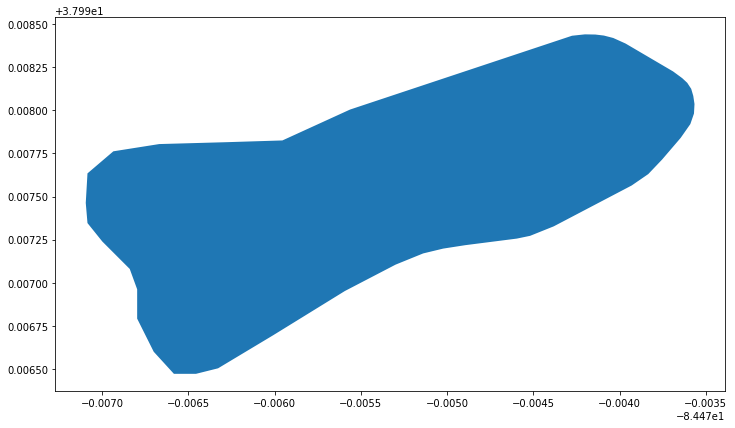

In [7]:
my_block = block_poly.loc[block_poly['GEOID10'] == '210670023022003']
ax = my_block.plot(figsize=(12,12));

### Randomly place points within polygon

In [8]:
poly = my_block['geometry']

In [9]:
list_of_points = []
counter = 0
while counter < 25:
    pnt = Point(random.uniform(poly.bounds.minx, poly.bounds.maxx), random.uniform(poly.bounds.miny, poly.bounds.maxy))
    if (poly.contains(pnt)).bool():
        list_of_points.append(pnt)
        counter +=1 
        print(pnt)

POINT (-84.47453442036391 37.99755290309878)
POINT (-84.47399465555196 37.99808763575956)
POINT (-84.47427306482054 37.99753638005878)
POINT (-84.47583661210662 37.99687822240634)
POINT (-84.47509134778585 37.99787272209728)
POINT (-84.47666438281119 37.99684855070768)
POINT (-84.47526336070223 37.99807378103414)
POINT (-84.4748667177886 37.99798108613825)
POINT (-84.47404603007972 37.99807523482853)
POINT (-84.47562565517987 37.99719415466685)
POINT (-84.47592430866654 37.99710853731118)
POINT (-84.47635516373046 37.99733885313825)
POINT (-84.47369854629852 37.99814505464369)
POINT (-84.47575974833897 37.9974268539085)
POINT (-84.47607392464953 37.99739032914279)
POINT (-84.47522623100033 37.99783936306522)
POINT (-84.47568800709453 37.99715484053804)
POINT (-84.47519332952201 37.99773335831983)
POINT (-84.47491556097346 37.99763435478429)
POINT (-84.47420838817776 37.99842397978856)
POINT (-84.4759846869762 37.99781156131123)
POINT (-84.47605207972549 37.99679785937605)
POINT (-84.47

(https://stackoverflow.com/questions/1233546/converting-list-of-tuples-into-a-dictionary)

In [10]:
for geom in list_of_points:
    x = mapping(geom)
    print (x)

{'type': 'Point', 'coordinates': (-84.47453442036391, 37.99755290309878)}
{'type': 'Point', 'coordinates': (-84.47399465555196, 37.99808763575956)}
{'type': 'Point', 'coordinates': (-84.47427306482054, 37.997536380058776)}
{'type': 'Point', 'coordinates': (-84.47583661210662, 37.996878222406345)}
{'type': 'Point', 'coordinates': (-84.47509134778585, 37.99787272209728)}
{'type': 'Point', 'coordinates': (-84.4766643828112, 37.99684855070768)}
{'type': 'Point', 'coordinates': (-84.47526336070223, 37.99807378103414)}
{'type': 'Point', 'coordinates': (-84.4748667177886, 37.99798108613825)}
{'type': 'Point', 'coordinates': (-84.47404603007972, 37.998075234828534)}
{'type': 'Point', 'coordinates': (-84.47562565517987, 37.99719415466685)}
{'type': 'Point', 'coordinates': (-84.47592430866654, 37.997108537311185)}
{'type': 'Point', 'coordinates': (-84.47635516373046, 37.997338853138245)}
{'type': 'Point', 'coordinates': (-84.47369854629852, 37.99814505464369)}
{'type': 'Point', 'coordinates': (-

### Create a dataframe from the list of dictionaries

In [11]:
point_df = pd.DataFrame(list_of_points)
point_df.columns = ['geometry']
print(point_df.columns.values)

['geometry']


In [12]:
geo_df = gpd.GeoDataFrame(point_df, geometry='geometry')
type(geo_df)

geopandas.geodataframe.GeoDataFrame

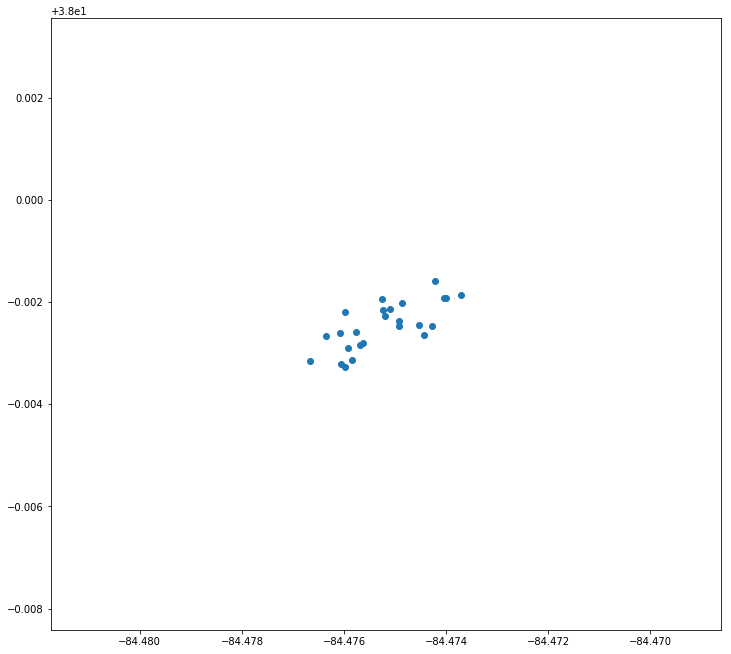

In [13]:
ax = geo_df.plot(figsize=(12,12));

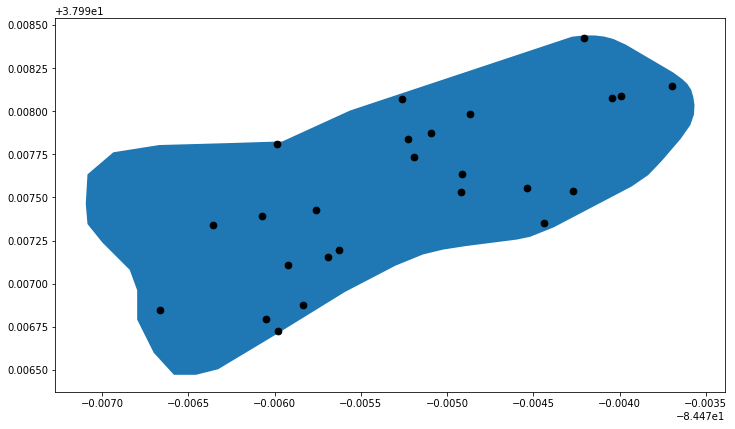

In [20]:
#ax = df1.plot()
#df2.plot(ax=ax)

ax = my_block.plot(figsize=(12,12))
geo_df.plot(ax=ax, markersize=45, color='k');
